In [1]:
#!pip install emoji

In [2]:
"""This is the PBL Project designed by Harshit Kesharwani, Aakash Nakarmi, Tamoshree Mallick and joy Swaroop"""

'This is the PBL Project designed by Harshit Kesharwani, Aakash Nakarmi, Tamoshree Mallick and joy Swaroop'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji
from IPython.core.interactiveshell import InteractiveShell
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


InteractiveShell.ast_node_interactivity = "all"



pd.set_option('display.max_rows', None)



pd.set_option('display.max_columns', None)


In [4]:
raw_data_csv = pd.read_csv('WhatsApp_Chat.txt', delimiter = "\t", header = None, names = ['text'])
data = pd.read_csv('WhatsApp_Chat.txt', delimiter = "\t", header = None, names = ['text'])

# Extract datetime
data[['datetime_str','text_2']] = data["text"].str.split(" - ", 1, expand=True)
data["datetime"] = pd.to_datetime(data["datetime_str"], format="%d/%m/%Y, %I:%M %p", errors='coerce')
data = data.dropna(subset=['datetime'])
data = data.drop(columns = ['datetime_str'])

# Extract sender and message
data[['sender','text_message']] = data['text_2'].str.split(': ', 1, expand=True)
data = data.dropna(subset=['text_message'])
data = data.drop(columns = ['text','text_2'])

# Anonomise Names
data['first_name'] = data['sender'].str.split(' ', expand = True)[0]
data['last_name'] = data['sender'].str.split(' ', expand = True)[1]
data['sender'] = data['first_name'].where(data['last_name'].isnull(), data['first_name'] + ' ' + data['last_name'])
data = data.drop(columns = ['first_name','last_name'])
print("The group contains "+ str(data.shape[0])+ " messages")
ans=0
for num in data['text_message']:
    if len(num)>ans:
        ans=len(num)
print("The maximum of length of the message is "+str(ans))
#data.info()
data.head(20)
data.tail(20)


The group contains 2026 messages
The maximum of length of the message is 286


C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\776608436.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['datetime_str','text_2']] = data["text"].str.split(" - ", 1, expand=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\776608436.py:11: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['sender','text_message']] = data['text_2'].str.split(': ', 1, expand=True)


,datetime,sender,text_message
2,2022-06-14 09:41:00,Naetik,
3,2022-06-14 09:41:00,+91 96256,Yes
4,2022-06-14 10:13:00,Ahateshaam SU,Kamal ki baat h ye log phle result dete h fr a...
5,2022-06-14 10:13:00,Ahateshaam SU,😂
6,2022-06-14 11:34:00,+91 99107,Aaj result hai?
7,2022-06-14 14:26:00,+91 88609,Jab aye msg krdena koi
8,2022-06-14 17:52:00,Varun,
9,2022-06-14 19:34:00,Satyam Cse,Results are out!!
10,2022-06-14 19:46:00,Joy,
11,2022-06-14 19:47:00,Ishant Yadav,


,datetime,sender,text_message
2371,2022-11-15 09:58:00,Joy,
2372,2022-11-15 09:59:00,+91 99107,Happy birthday @919696750061
2373,2022-11-15 10:06:00,Harshit,Thank you 🙂
2374,2022-11-15 10:06:00,Harshit,Thank you 🙂
2375,2022-11-15 10:07:00,Harshit,Thanks bro
2376,2022-11-15 10:19:00,Varun,happy birthday @919696750061 bro
2377,2022-11-15 10:20:00,Harshit,Thank you brother
2378,2022-11-15 10:34:00,Dhaerya,Anyone carrying micro USB?
2379,2022-11-15 10:35:00,Varun,prashnt
2380,2022-11-15 10:36:00,+91 99107,Varun


Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'Day of Week')

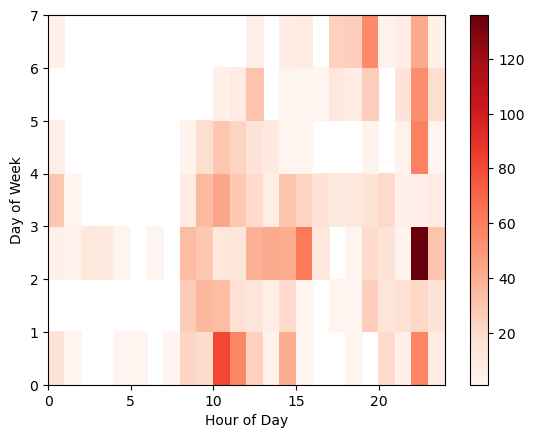

In [5]:

data['day_of_week'] = data['datetime'].dt.dayofweek + 1
data['hour_of_day'] = data['datetime'].dt.hour


heatmap_data = data.groupby(['day_of_week', 'hour_of_day']).size()
heatmap_data = heatmap_data.unstack()


plt.pcolor(heatmap_data, cmap='Reds')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.colorbar()
plt.show()

<Figure size 1500x500 with 0 Axes>

<BarContainer object of 48 artists>

Text(0.5, 0, 'Sender')

Text(0, 0.5, 'Message Count')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

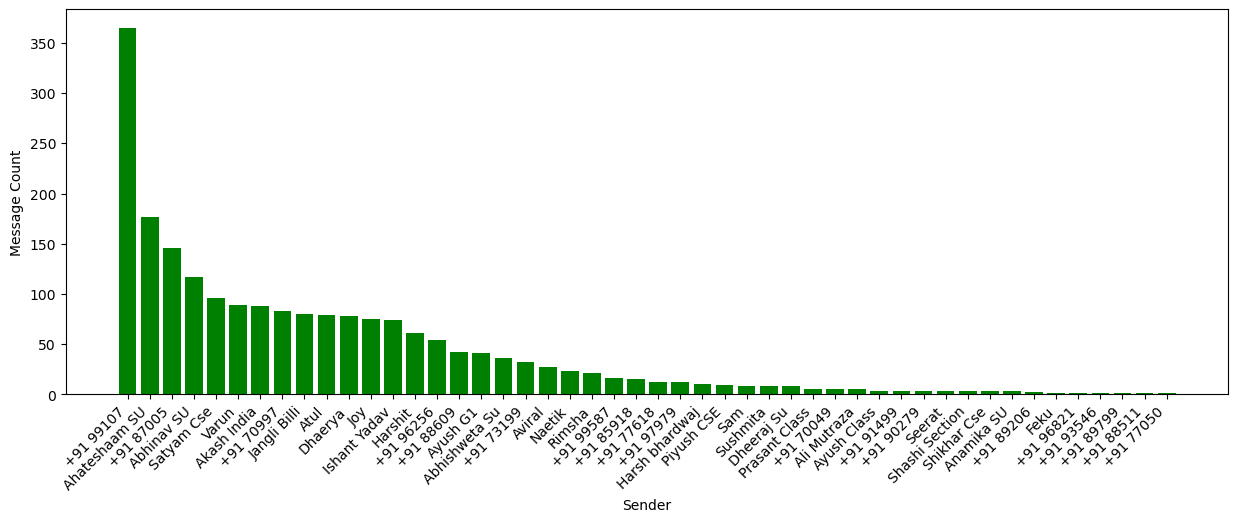

In [6]:
# Create sender counts as a series
sender_count_series = data.groupby(['sender']).size().sort_values(ascending=False)

# Create sender counts series as a DataFrame
sender_count_df = pd.DataFrame(sender_count_series)

# Reset index in order to name columns correctly
sender_count_df = sender_count_df.reset_index()
sender_count_df.columns = ['sender', 'count']

# Plot bar chart with sender message counts
plt.figure(figsize=(15, 5))
plt.bar(sender_count_df['sender'], sender_count_df['count'], color='green')
plt.xlabel("Sender")
plt.ylabel("Message Count")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2377782509.py:16: FutureWarning: The frame.append method is deprecated and will be 

,words,count
0,hai,194
1,h,101
2,bhai,86
3,ki,71
4,class,68
5,ka,57
6,toh,56
7,bhi,55
8,hi,50
9,se,49


<BarContainer object of 10 artists>

<function matplotlib.pyplot.show(close=None, block=None)>

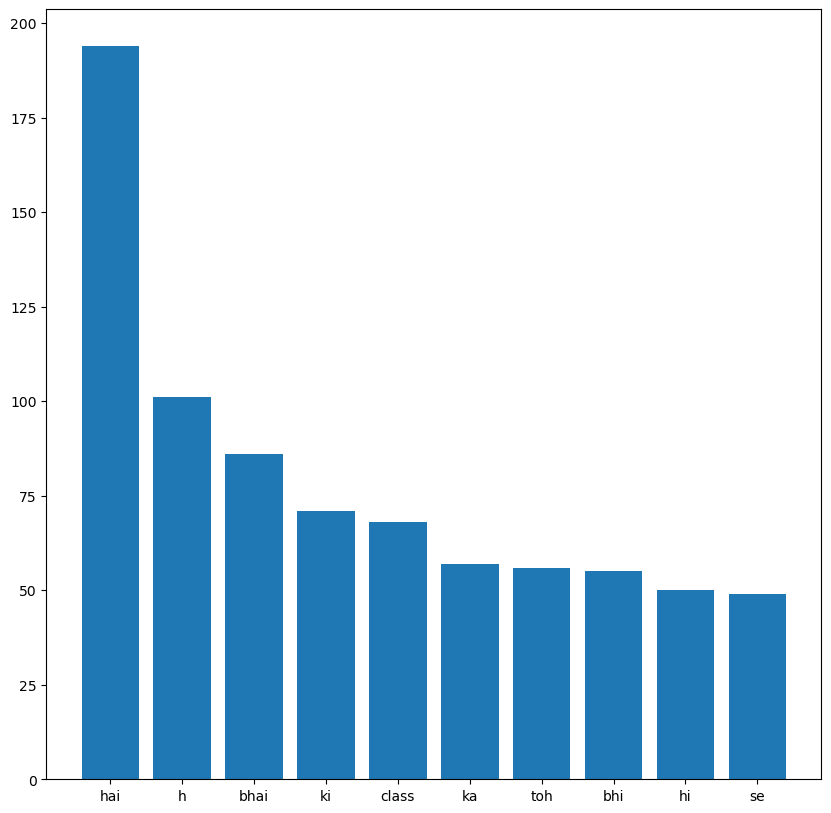

In [7]:
## Create DataFrame with all words used split by sender
# Filter out 'Media Omitted' messages
data_texts = data[~data['text_message'].str.contains('omitted')]

# Create empty DataFrame to use for the word count
words = pd.DataFrame(columns=['sender','words'])

# Loop through all messages in the DataFrame
for sender, message in zip(data_texts.sender, data_texts.text_message):
 
  # Split out each word in each message
  message_split = message.split()
  for word in message_split:
 
    # Add each word to the DataFrame
    words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)

# Remove punctuation from the start and end of words
words['words'] = words['words'].str.replace('(^\W)|(\W$)','')

# Create list of 'non-words' that we don't care about
non_words = ['the','to','a','i','you','it','and','for','be','that','in','of','have','on','at','is','as','or','we','if','so','']

# Filter out this list of 'non-words' from each set of words
words_filtered = words[~words['words'].isin(non_words)]

# Create word counts as a series
word_count_total_series = words_filtered.groupby(['words']).size().sort_values(ascending=False)

# Create word counts series as a DataFrame
word_count_total = pd.DataFrame(word_count_total_series)

# Reset index in order to name columns correctly
word_count_total = word_count_total.reset_index()
word_count_total.columns = ['words', 'count']

# Display top 10 words used
word_count_total.head(10)
f = plt.figure(figsize=(10, 10))
x = word_count_total["words"][:10]
y = word_count_total["count"][:10]
plt.bar(x, y)
plt.show

<AxesSubplot:>

,words,count
93,birthday,11
97,happy,11
118,quiz,9
159,assignment,7
1193,sorry,1


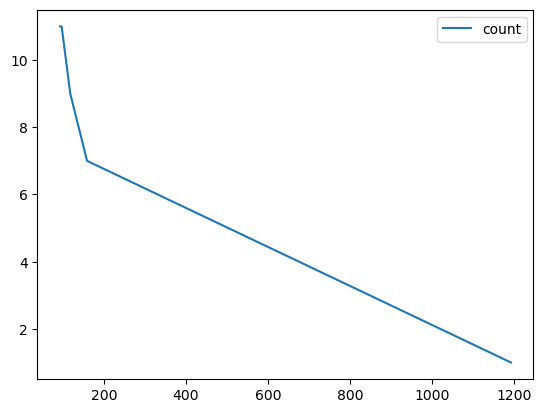

In [8]:
# Find where a word comes in combined count
word_count_total[word_count_total['words'].isin(['assignment','Harshit','sorry','beers','fitness','pub','quiz','happy','birthday','hockey'])].plot()
word_count_total[word_count_total['words'].isin(['assignment','Harshit','sorry','beers','fitness','pub','quiz','happy','birthday','hockey'])]


<BarContainer object of 20 artists>

Text(0.5, 0, 'Unique Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, 'Tamoshree Word Usage')

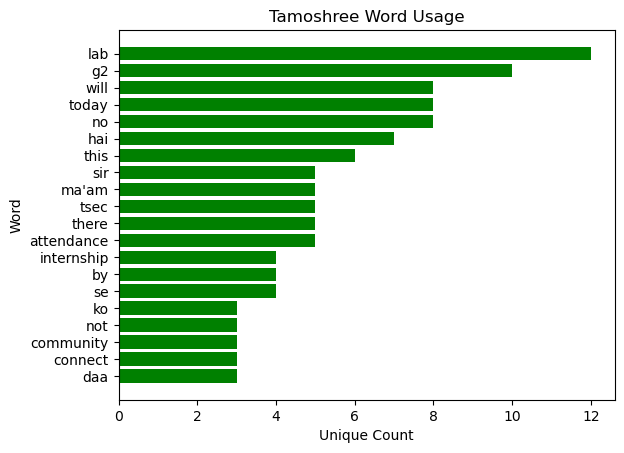

<BarContainer object of 20 artists>

Text(0.5, 0, 'Unique Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, "Aakash's Word Usage")

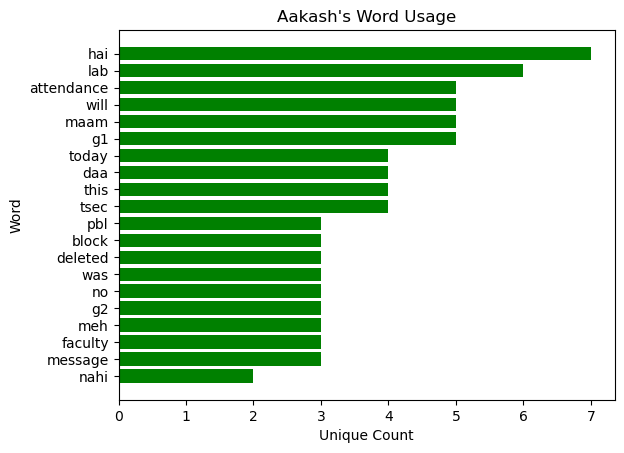

<BarContainer object of 20 artists>

Text(0.5, 0, 'Unique Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, "Joy's Word Usage")

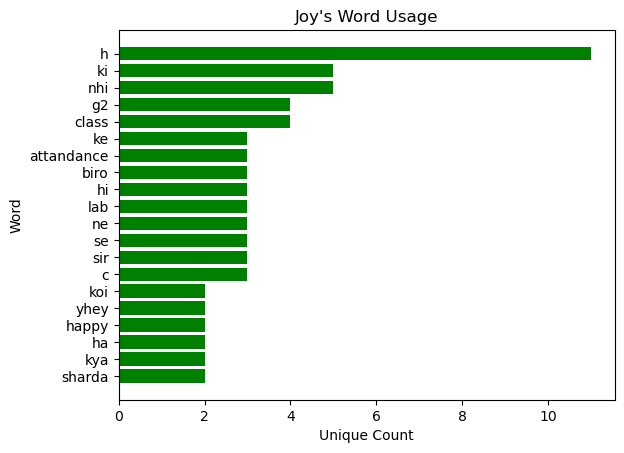

<BarContainer object of 20 artists>

Text(0.5, 0, 'Unique Count')

Text(0, 0.5, 'Word')

Text(0.5, 1.0, "Lakshya's Word Usage")

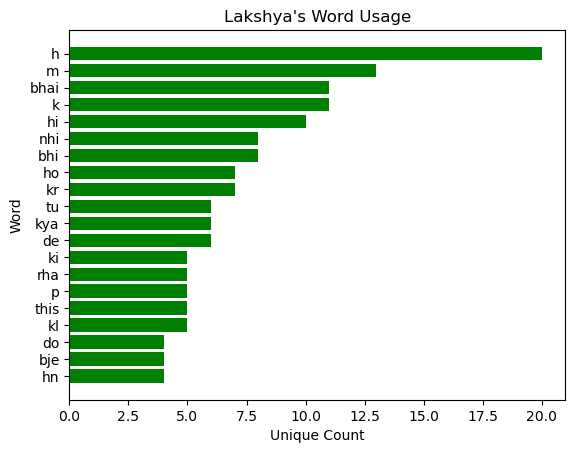

In [9]:
# Create word counts by sender as a series
word_count_by_sender_series = words_filtered.groupby(['sender', 'words']).size().sort_values(ascending=False)

# Create word counts by sender series as a DataFrame
word_count_by_sender = pd.DataFrame(word_count_by_sender_series)

# Reset index in order to name columns correctly
word_count_by_sender = word_count_by_sender.reset_index()
word_count_by_sender.columns = ['sender', 'words', 'count']

# Plot bar chart with top n all words used by Tamoshree
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Jangli Billi'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Tamoshree Word Usage")
plt.show()

# Plot bar chart with top n all words used by Aakash
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Akash India'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Aakash's Word Usage")
plt.show()

# Plot bar chart with top n all words used by Joy
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='Joy'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Joy's Word Usage")
plt.show()
# Plot bar chart with top n all words used by Lakshya
word_count_by_sender_top_n = word_count_by_sender[word_count_by_sender['sender']=='+91 87005'].head(20).sort_values(by='count',ascending=True)
plt.barh(word_count_by_sender_top_n['words'], word_count_by_sender_top_n['count'], color='green')
plt.xlabel("Unique Count")
plt.ylabel("Word")
plt.title("Lakshya's Word Usage")
plt.show()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2419562647.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2419562647.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2419562647.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2419562647.py:17: Fu

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2419562647.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2419562647.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2419562647.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_14828\2419562647.py:17: Fu

,sender,emoji,datetime
count,390,390,390
unique,31,62,184
top,+91 99107,😂,2022-11-13 18:05:00
freq,51,147,15
first,NaN,NaN,2022-06-14 10:13:00
last,NaN,NaN,2022-11-15 10:06:00


emoji
😂    147
🙂     63
🤣     35
🥲     13
❤     10
✨      7
🫠      7
🥹      6
🫤      5
🥳      5
👍      4
❌      4
😌      4
🤧      3
😅      3
💫      3
🐦      3
😬      3
🥺      3
🎊      3
🤓      2
😞      2
🙏      2
🙄      2
😵      2
😏      2
🕊      2
🔥      2
💨      2
💙      2
👑      2
👌      2
👀      2
🏻      2
🫣      2
⚠      2
🙃      2
🤦      1
🤒      1
🤍      1
🤌      1
🫢      1
☺      1
😶      1
🔫      1
✅      1
✋      1
✌      1
❓      1
🎂      1
🎉      1
💯      1
😃      1
😲      1
😎      1
♂      1
😑      1
😡      1
😢      1
😭      1
😮      1
🫥      1
dtype: int64

<AxesSubplot:xlabel='emoji'>

C:\Users\Harsh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Harsh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129299 (\N{NERD FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Harsh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Harsh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129292 (\U0001f90c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Harsh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


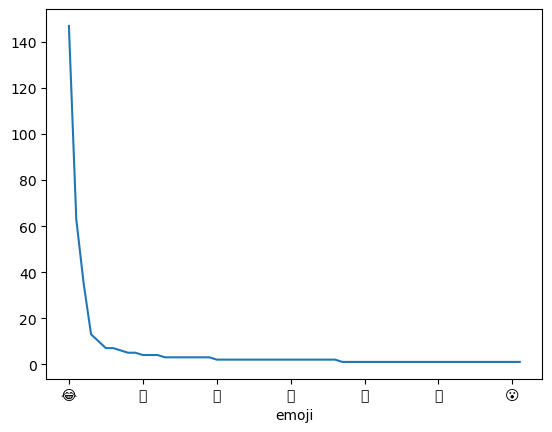

In [10]:
# Clear DataFrame to create words used
emojis = pd.DataFrame(columns=['sender','emoji','datetime'])

# Loop through all messages in the DataFrame
for sender, message, datetime in zip(data.sender, data.text_message, data.datetime):

  # Split out each word in each message
  message_split = list(message)
 
  # Loop through each word in split message
  for character in message_split:
 
    # If the word is an emoji
    if character in emoji.EMOJI_DATA and character != "\U0001f3fc":
 
      # Add each emoji to the DataFrame
      emojis = emojis.append({'sender' : sender, 'emoji' : character, 'datetime' : datetime}, ignore_index=True)

# Display top n most popular emojis
emojis.describe()
emojis.groupby(['emoji']).size().sort_values(ascending=False)


#piplot needed with emogie as a label
emojis.groupby(['emoji']).size().sort_values(ascending=False).plot()

There are 39499 words in all the messages.


<Figure size 1000x500 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

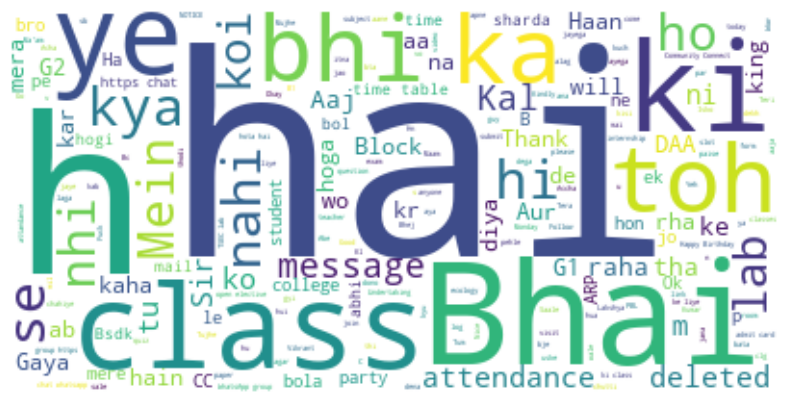

In [11]:
text = " ".join(review for review in data.text_message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [14]:
import nltk
import pandas as pd

# download necessary NLTK corpora
nltk.download('vader_lexicon')
nltk.download('punkt')

# import the Vader sentiment analyzer from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create a sentiment analyzer object
sia = SentimentIntensityAnalyzer()



# create an empty list to store sentiment scores
sentiment_scores = []
# extract the text to analyze
text = row;['text_message']
    
# use the sentiment analyzer to get sentiment scores
scores = sia.polarity_scores(text)
    
# add the scores to the list
sentiment_scores.append(scores)
    
# add the sentiment scores as columns to the dataframe
data['negative'] = [score['neg'] for score in sentiment_scores]
data['neutral'] = [score['neu'] for score in sentiment_scores]
data['positive'] = [score['pos'] for score in sentiment_scores]
data['compound'] = [score['compound'] for score in sentiment_scores]

# print the resulting dataframe
print(df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

['text_message']

AttributeError: 'Series' object has no attribute 'encode'